In [1]:
import cv2
import os

In [128]:
cam = cv2.VideoCapture(0)
cam.set(3, 640) # set video width
cam.set(4, 480) # set video height

face_detector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# For each person, enter one numeric face id
face_id = input('\n enter user id end press <return> ==>  ')

print("\n [INFO] Initializing face capture. Look the camera and move the head left right up down for 10 seconds ...")
# Initialize individual sampling face count
count = 0

while(True):

    ret, img = cam.read()
    #img = cv2.flip(img, -1) # flip video image vertically
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2BGRA)
    faces = face_detector.detectMultiScale(gray, 1.3, 5)

    for (x,y,w,h) in faces:

        cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 2)     
        count += 1

        # Save the captured image into the datasets folder
        cv2.imwrite("dataset/User." + str(face_id) + '.' + str(count) + ".jpg", gray[y:y+h,x:x+w])

        cv2.imshow('image', img)

    k = cv2.waitKey(100) & 0xff # Press 'ESC' for exiting video
    if k == 27:
        break
    elif count >= 100: # Take 100 face sample and stop video
         break

# Do a bit of cleanup
print("\n [INFO] Exiting Program and cleanup stuff")
cam.release()
cv2.destroyAllWindows()


 enter user id end press <return> ==>  maria

 [INFO] Initializing face capture. Look the camera and move the head left right up down for 10 seconds ...

 [INFO] Exiting Program and cleanup stuff


In [204]:
# folder where images are present
TrainingImagePath='./dataset11'

from keras.preprocessing.image import ImageDataGenerator
img_rows, img_cols = 64, 64
batch_size=32

# Defining pre-processing transformations on raw images of training data
# These hyper parameters helps to generate slightly twisted versions
# of the original image, which leads to a better model, since it learns
# on the good and bad mix of images
train_datagen = ImageDataGenerator(
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True)

# Defining pre-processing transformations on raw images of testing data
# No transformations are done on the testing images
test_datagen = ImageDataGenerator()

'''# Let's use some data augmentaiton 
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=30,
      shear_range=0.3,
      zoom_range=0.3,
      width_shift_range=0.4,
      height_shift_range=0.4,
      horizontal_flip=True,
      fill_mode='nearest')'''

# Generating the Training Data
training_set = train_datagen.flow_from_directory(
        TrainingImagePath,
        target_size=(img_rows, img_rows),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)


# Generating the Testing Data
test_set = test_datagen.flow_from_directory(
        TrainingImagePath,
        target_size=(img_rows, img_rows),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)

# Printing class labels for each face
test_set.class_indices

Found 1 images belonging to 1 classes.
Found 1 images belonging to 1 classes.


{'New folder': 0}

In [186]:
# Creating lookup table for all faces 
# class_indices have the numeric tag for each face
TrainClasses=training_set.class_indices

# Storing the face and the numeric tag for future reference
ResultMap={}
for faceValue,faceName in zip(TrainClasses.values(),TrainClasses.keys()):
    ResultMap[faceValue]=faceName


# Saving the face map for future reference
import pickle
with open("ResultsMap.pkl", 'wb') as fileWriteStream:
    pickle.dump(ResultMap, fileWriteStream)

# The model will give answer as a numeric tag
# This mapping will help to get the corresponding face name for it
print("Mapping of Face and its ID",ResultMap)

# The number of neurons for the output layer is equal to the number of faces
OutputNeurons=len(ResultMap)
print('/n The Number of output neurons: ', OutputNeurons)

Mapping of Face and its ID {0: 'AJ_Cook', 1: 'AJ_Lamas', 2: 'Aaron_Eckhart', 3: 'Aaron_Guiel', 4: 'Aaron_Patterson', 5: 'Aaron_Peirsol', 6: 'Aaron_Pena', 7: 'Aaron_Sorkin', 8: 'Aaron_Tippin', 9: 'Abba_Eban', 10: 'Abbas_Kiarostami', 11: 'Abdel_Aziz_Al-Hakim', 12: 'Abdel_Madi_Shabneh', 13: 'Abdel_Nasser_Assidi', 14: 'Abdoulaye_Wade', 15: 'Abdul_Majeed_Shobokshi', 16: 'Abdul_Rahman', 17: 'Abdulaziz_Kamilov', 18: 'Abdullah', 19: 'Abdullah_Ahmad_Badawi', 20: 'Abdullah_Gul', 21: 'Abdullah_Nasseef', 22: 'Abdullah_al-Attiyah', 23: 'Abdullatif_Sener', 24: 'Abel_Aguilar', 25: 'Abel_Pacheco', 26: 'Abid_Hamid_Mahmud_Al-Tikriti', 27: 'Abner_Martinez', 28: 'Abraham_Foxman', 29: 'Aby_Har-Even', 30: 'Adam_Ant', 31: 'Adam_Freier', 32: 'Adam_Herbert', 33: 'Adam_Kennedy', 34: 'Adam_Mair', 35: 'Adam_Rich', 36: 'Adam_Sandler', 37: 'Adam_Scott', 38: 'Adel_Al-Jubeir', 39: 'Adelina_Avila', 40: 'Adisai_Bodharamik', 41: 'Adolfo_Aguilar_Zinser', 42: 'Adolfo_Rodriguez_Saa', 43: 'Adoor_Gopalakarishnan', 44: 'Adria

In [187]:
# Create CNN deep learning model 
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.models import Model

# Initializing the Convolutional Neural Network
classifier= Sequential()

# STEP--1 Convolution
# Adding the first layer of CNN
# we are using the format (64,64,3) because we are using TensorFlow backend
# It means 3 matrix of size (64X64) pixels representing Red, Green and Blue components of pixels

classifier.add(Convolution2D(32, kernel_size=(5, 5), strides=(1, 1), input_shape=(64,64,3), activation='relu'))

# STEP--2 MAX Pooling
classifier.add(MaxPool2D(pool_size=(2,2)))

# ADDITIONAL LAYER of CONVOLUTION for better accuracy 
classifier.add(Convolution2D(64, kernel_size=(5, 5), strides=(1, 1), activation='relu'))

classifier.add(MaxPool2D(pool_size=(2,2)))

# STEP--3 FLattening
classifier.add(Flatten())

# STEP--4 Fully Connected Neural Network
classifier.add(Dense(64, activation='relu'))

classifier.add(Dense(OutputNeurons, activation='softmax'))
print(classifier.summary())

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 60, 60, 32)        2432      
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 26, 26, 64)        51264     
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 10816)             0         
_________________________________________________________________
dense_32 (Dense)             (None, 64)                692288    
_________________________________________________________________
dense_33 (Dense)             (None, 553)             

In [193]:
%%time
#train model
from keras.optimizers import RMSprop, SGD, Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("/home/deeplearningcv/DeepLearningCV/Trained Models/face_recognition1_vgg.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 3, verbose = 1, min_delta = 0.0001)

# we put our call backs into a callback list
callbacks = [earlystop, checkpoint, reduce_lr]


# Compiling the CNN
#classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
classifier.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=["accuracy"])


batch_size=32
nb_train_samples = 1390  
nb_validation_samples = 1390  

# Starting the model training
classifier.fit_generator(
                    training_set,
                    steps_per_epoch=nb_train_samples // batch_size,
                    epochs=30,
                    #callbacks = callbacks,
                    validation_data=test_set,
                    validation_steps=nb_validation_samples // batch_size)


#fname='clasifier_weights.h5'
#classifier.save_weights('clas-wei')
#frame='clasifier_weights.h5'
#classifier.load_weights(fname)
#classifier.save_weights("clasifier_weights2.h5")
#load_status = classifier.load_weights("clasifier_weights2.h5")
#model = Model(inputs=classifier.layers[0].input, outputs=classifier.layers[-3].output)

Epoch 1/30
43/43 [==============================] - 17s 368ms/step - loss: 1.0981 - accuracy: 0.7025 - val_loss: 0.5673 - val_accuracy: 0.8328
Epoch 2/30
43/43 [==============================] - 14s 314ms/step - loss: 0.8740 - accuracy: 0.7573 - val_loss: 0.6572 - val_accuracy: 0.8016
Epoch 3/30
43/43 [==============================] - 14s 321ms/step - loss: 0.7522 - accuracy: 0.7851 - val_loss: 0.4596 - val_accuracy: 0.8648
Epoch 4/30
43/43 [==============================] - 14s 317ms/step - loss: 0.7323 - accuracy: 0.7975 - val_loss: 0.4898 - val_accuracy: 0.8597
Epoch 5/30
43/43 [==============================] - 14s 317ms/step - loss: 0.7523 - accuracy: 0.8095 - val_loss: 0.4914 - val_accuracy: 0.8626
Epoch 6/30
43/43 [==============================] - 14s 315ms/step - loss: 0.5841 - accuracy: 0.8165 - val_loss: 0.3347 - val_accuracy: 0.8961
Epoch 7/30
43/43 [==============================] - 14s 314ms/step - loss: 0.6622 - accuracy: 0.8089 - val_loss: 0.3577 - val_accuracy: 0.8888

In [173]:
#model = Model(inputs=classifier.layers[0].input, outputs=classifier.layers[-3].output)

In [174]:
class_labels = test_set.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())
#class_labels

In [ ]:
cam = cv2.VideoCapture(0)
cam.set(3, 640) # set video width
cam.set(4, 480) # set video height

face_detector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# For each person, enter name
face_name = input('\n enter name end press <return> ==>  ')

print("\n [INFO] Initializing face capture. Look the camera and move the head left right up down for 10 seconds ...")
# Initialize individual sampling face count
count = 0

while(True):

    ret, img = cam.read()
    #img = cv2.flip(img, -1) # flip video image vertically
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2BGRA)
    faces = face_detector.detectMultiScale(gray, 1.3, 5)

    for (x,y,w,h) in faces:

        cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 2)     
        count += 1

        # Save the captured image into the datasets folder
        cv2.imwrite( str(face_name) + ".jpg", gray[y:y+h,x:x+w])
        
        
        cv2.imshow('image', img)

    k = cv2.waitKey(100) & 0xff # Press 'ESC' for exiting video
    if k == 27:
        break
    elif count >= 1: # Take 1 face sample and stop video
         break

# Do a bit of cleanup
print("\n [INFO] Exiting Program and cleanup stuff")
cam.release()
cv2.destroyAllWindows()

In [175]:
import numpy as np
import cv2

from keras.models import Model, Sequential
from keras.layers import Input, Convolution2D, ZeroPadding2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from PIL import Image
from keras.preprocessing.image import load_img, save_img, img_to_array
from keras.applications.imagenet_utils import preprocess_input
from keras.preprocessing import image
import matplotlib.pyplot as plt
from os import listdir
from keras.layers import Convolution2D
from keras.layers import MaxPool2D

In [176]:
def preprocess_image(image_path):
    """Loads image from path and resizes it"""
    img = load_img(image_path, target_size=(64, 64))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img

In [68]:
def loadFaceModel():
    classifier= Sequential()

    classifier.add(Convolution2D(32, kernel_size=(5, 5), strides=(1, 1), input_shape=(64,64,3), activation='relu'))

    classifier.add(MaxPool2D(pool_size=(2,2)))

    classifier.add(Convolution2D(64, kernel_size=(5, 5), strides=(1, 1), activation='relu'))

    classifier.add(MaxPool2D(pool_size=(2,2)))

    classifier.add(Flatten())

    classifier.add(Dense(64, activation='relu'))

    classifier.add(Dense(OutputNeurons, activation='softmax'))
    
    from keras.models import model_from_json    
    classifier.load_weights('clasifier_weights2.h5')
    face_descriptor = Model(inputs=classifier.layers[0].input, outputs=classifier.layers[-3].output)
    
    return face_descriptor

model = loadFaceModel()
print("Model Loaded")

Model Loaded


In [201]:
#points to your extracted faces
people_pictures = "./group_of_faces/"

all_people_faces = dict()

for file in listdir(people_pictures):
    person_face, extension = file.split(".")
    all_people_faces[person_face] = classifier.predict(preprocess_image('./group_of_faces/%s.jpg' % (person_face)))[0,:]

print("Face representations retrieved successfully")

def findCosineSimilarity(source_representation, test_representation):
    a = np.matmul(np.transpose(source_representation), test_representation)
    b = np.sum(np.multiply(source_representation, source_representation))
    c = np.sum(np.multiply(test_representation, test_representation))
    return 1 - (a / (np.sqrt(b) * np.sqrt(c)))

#Open Webcam
cap = cv2.VideoCapture(0) 

while(True):
    ret, img = cap.read()
    faces = face_detector.detectMultiScale(img, 1.3, 5)

    for (x,y,w,h) in faces:
        if w > 100: #Adjust accordingly if your webcam resoluation is higher
            cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2) #draw rectangle to main image
            detected_face = img[int(y):int(y+h), int(x):int(x+w)] #crop detected face
            detected_face = cv2.resize(detected_face, (64, 64)) #resize to 224x224

            img_pixels = image.img_to_array(detected_face)
            img_pixels = np.expand_dims(img_pixels, axis = 0)
            img_pixels /= 255

            captured_representation = classifier.predict(img_pixels)[0,:]

            found = 0
            for i in all_people_faces:
                person_name = i
                representation = all_people_faces[i]

                similarity = findCosineSimilarity(representation, captured_representation)
                if(similarity < 0.85):
                    cv2.putText(img, person_name[0:], (int(x+w+15), int(y-12)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
                    found = 1
                    break

            #connect face and text
            cv2.line(img,(int((x+x+w)/2),y+15),(x+w,y-20),(255, 0, 0),1)
            cv2.line(img,(x+w,y-20),(x+w+10,y-20),(255, 0, 0),1)

            if(found == 0): #if found image is not in our people database
                cv2.putText(img, 'unknown', (int(x+w+15), int(y-12)), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

    cv2.imshow('img',img)

    if cv2.waitKey(1) == 13: #13 is the Enter Key
        break
        
cap.release()
cv2.destroyAllWindows()

Face representations retrieved successfully


In [197]:
epsilon = 0.40

def verifyFace(img1, img2):
    img1_representation = model.predict(preprocess_image('%s' % (img1)))[0,:]
    img2_representation = model.predict(preprocess_image('%s' % (img2)))[0,:]
    
    cosine_similarity = findCosineSimilarity(img1_representation, img2_representation)
    
    f = plt.figure()
    f.add_subplot(1,2, 1)
    plt.imshow(image.load_img('%s' % (img1)))
    plt.xticks([]); plt.yticks([])
    f.add_subplot(1,2, 2)
    plt.imshow(image.load_img('%s' % (img2)))
    plt.xticks([]); plt.yticks([])
    plt.show(block=True)
    
    print("Cosine similarity: ",cosine_similarity)
    
    if(cosine_similarity < epsilon):
        print("They are same person")
    else:
        print("They are not same person!")

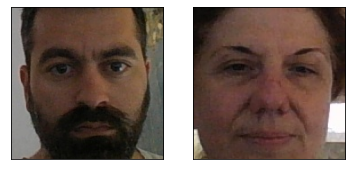

Cosine similarity:  0.0889054536819458
They are same person


In [198]:
# Let's compare two faces images of Angelina Jolie
verifyFace("stathis.jpg", "user_olga.jpg")